# Lab 8-2: Timeseries and FFT

(Derived from CEE599_timeseries.m, November 2015, Jessica Lundquist. Converted to python November 2019, and updated with examples from [Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html), Nov. 2023, Steven Pestana)
***


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

***

## Sinusoids, autocorrelation, sampling frequency

Briefly review sine and cosine functions

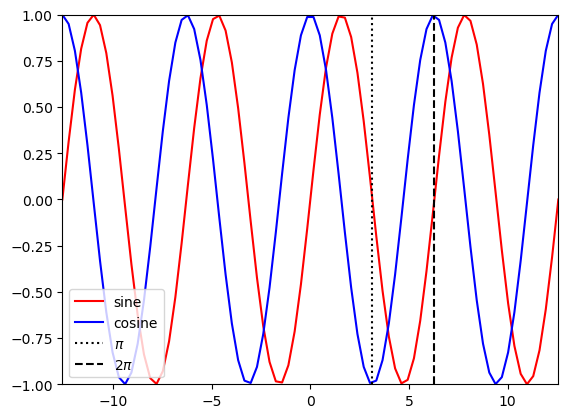

In [2]:
t1 = np.linspace(-4*np.pi,4*np.pi,80)
        
plt.figure()
plt.plot(t1,np.sin(t1),'r-',label='sine')
plt.plot(t1,np.cos(t1),'b-',label='cosine')
plt.plot([np.pi, np.pi],[-1,1],'k:',label='$\pi$')
plt.plot([2*np.pi, 2*np.pi],[-1,1],'k--',label='2$\pi$')
plt.legend(loc='lower left')
plt.xlim((-4*np.pi,4*np.pi))
plt.ylim((-1,1));


---
## Autocorrelation

Consider the autocorrelation of a sine function at various lags

In [3]:
# Create a sine function evaluated every 0.01 from 0 to 100
step = 0.01
t2 = np.arange(0,100,step)
y1 = np.sin(t2)

In [4]:
# Calculate the autocorrelation at lags from 0.01 (one time-step) to 6 (about a third of the series)
lag_min = 1
lag_max = 30
auto1 = []
lags1 = []
for lag in range(lag_min,int(lag_max/step)):
    v = np.corrcoef(y1[:-lag],y1[lag:])
    lags1.append(lag*step)
    auto1.append(v[0,1])

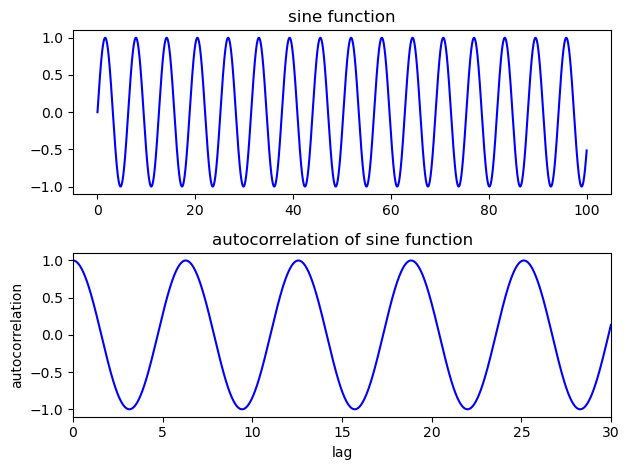

In [5]:
f, ax = plt.subplots(2,1)

ax[0].plot(t2,y1,'b')
ax[0].set_title('sine function')

ax[1].plot(lags1,auto1,'b')
ax[1].set_title('autocorrelation of sine function')
ax[1].set_xlabel('lag')
ax[1].set_ylabel('autocorrelation')
ax[1].set_xlim(0,30);
plt.tight_layout()


Look at the autocorrelation again, but this time we're **undersampling** the sine function

In [6]:
# Step is the interval at which we're sampling
step = 2 # Try changing it to larger and smaller numbers to test how well we can calculate the true autocorrelation of the sine function
t3 = np.arange(0,100,step)
y2 = np.sin(t3)

# calculate autocorrelation
auto2 = []
lags2 = []
for lag in range(lag_min,int(lag_max/step)):
    v = np.corrcoef(y2[:-lag],y2[lag:])
    lags2.append(lag*step)
    auto2.append(v[0,1])

N1=len(t2)
N2=len(t3)
print(N1)
print(N2)
print(len(auto2))
NA = len(auto2)

10000
50
14


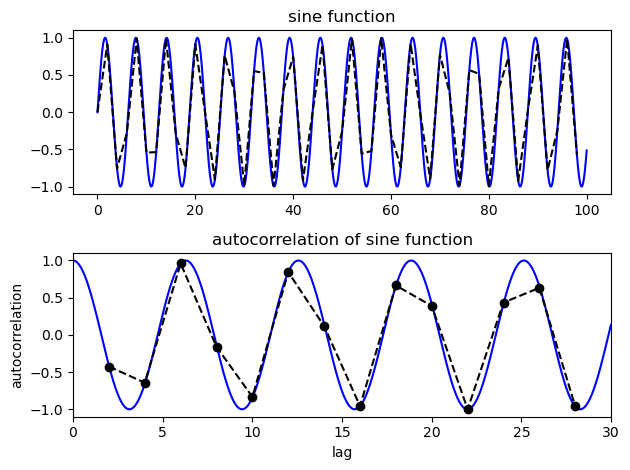

In [7]:
f, ax = plt.subplots(2,1)

ax[0].plot(t2,y1,'b')
ax[0].set_title('sine function')
ax[0].plot(t3,y2,'k--')

ax[1].plot(lags1,auto1,'b')
ax[1].set_title('autocorrelation of sine function')
ax[1].set_xlabel('lag')
ax[1].set_ylabel('autocorrelation')
ax[1].plot(lags2,auto2,'k--o')
ax[1].set_xlim(0,30);

plt.tight_layout()

***

## Timeseries analysis

We want to use timeseries analysis to decompose a signal into its component frequency parts. To do this, we'll use the Fourier Transform, and more specifically, the Fast Fourier Transform, FFT (a computationally efficient method of computing Fourier Transforms).

Make some sinusoidal data:

In [8]:
# sampling rate in Hz
sr_hz = 100

# total time in seconds
total_seconds = 3

# length of dataset
N = sr_hz * total_seconds
print(N)

# create timeseries in seconds
t = np.linspace(0,total_seconds,N)

300


In [9]:
# set amplitudes
a1 = 2
a2 = 3
a3 = 1

# set frequencies
f1 = 1
f2 = 7
f3 = 3


# create sinusoidal data
x1 = a1*np.sin(f1*2*np.pi*t)
x2 = a2*np.cos(f2*2*np.pi*t)
x3 = a3*np.sin(f3*2*np.pi*t)
# total signal is the sum of these
x = x1 + x2 + x3

Text(0.5, 0, 'Time [s]')

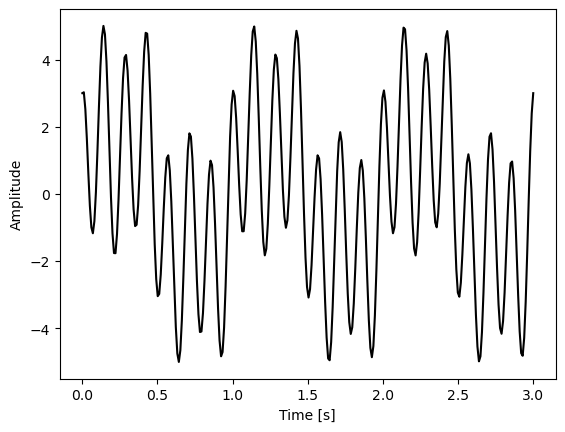

In [10]:
plt.plot(t, x, 'k')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')

Before proceedding, think about what the coefficients of the Fourier transform might look like for this case?

In [11]:
X = np.fft.fft(x)
X.shape
#print(X)

(300,)

Note that the result gives us N numbers here, matching our sample size.  

The first value is the mean, which for our example data above should be 0.

In [12]:
print(X[0]) # This corresponds to the mean value. To get the mean it should be divided by N, the length of the series.

# In this case, it is 0, so we can check that that's true:
print(X[0]/N)
# Note that rounding error makes it not perfectly 0.

(2.999999999999732+0j)
(0.009999999999999109+0j)


In [13]:
print(X[1]) # the next value corresponds to the coefficients for a frequency of 1 time per cycle
# the real numbers of the cosine coefficients, and the imaginary numbers are the sine coefficients

(3.015543237114492-0.8268954739774024j)


In [14]:
#to get coefficients of sine and cosine timeseries, we need to divide by N/2 to normalize
# use that with the values in Cns1
first_sin_coeff = -X[1].imag / (N/2) # first sine coefficient
first_cos_coeff = X[1].real / (N/2)  # first cosine coefficient
print(first_sin_coeff)
print(first_cos_coeff)

0.005512636493182683
0.02010362158076328


Plot our coefficients versus frequency

In [15]:
# we only want the first half of our FFT result (positive frequencies)
X = X[:N//2]

# get our sine and cosine coefficients
cosine_coeffs = np.abs(X[1:].real) / (N/2) # skip X[0], the mean of our data
sine_coeffs = np.abs(X[1:].imag) / (N/2) # skip X[0], the mean of our data

# compute the frequencies we're looking at
freqs = np.arange(N//2) / total_seconds
# remove frequency of 0 (the corresponds to the mean)
freqs = freqs[1:]

Plot to visualize the results. Does this match our input data?

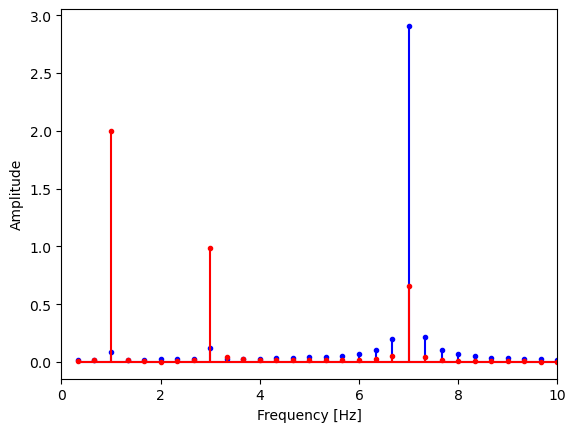

In [16]:
plt.stem(freqs, cosine_coeffs, 'b', markerfmt=".", basefmt="-b") # real part are cosines
plt.stem(freqs, sine_coeffs, 'r', markerfmt=".", basefmt="-r") # imaginary part are sines
plt.xlim(0,10) # zoom in to lower frequencies
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]');

**Take a moment to make sure you understand what the FFT is able to tell us in the above example...**

Do these values make sense with what you put in?
* Try changing the sine and/or cosine amplitudes and frequencies of the original timeseries.
* Also, try changing the sampling frequency (more or less frequently) and see what you get.

Then move on to Lab 8-3.
